In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data Loading
- Menggunakan dataset : joebeachcapital/diabetes-factors
- Dataset diunduh dari Kaggle dan disimpan di dalam folder data.
- Selanjutnya, data dibaca menggunakan pandas dan ditampilkan beberapa baris pertama untuk mendapatkan gambaran awal isi dataset.

In [2]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files('joebeachcapital/diabetes-factors', path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/diabetes-factors


In [3]:
df = pd.read_csv('data/diabetes-vid.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,alive
764,2,122,70,27,0,36.8,0.340,27,alive
765,5,121,72,23,112,26.2,0.245,30,alive
766,1,126,60,0,0,30.1,0.349,47,dead


Dataset ini terdiri dari total 768 baris data, dengan kolom-kolom sebagai berikut:
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, dan Outcome.

# Exploratory Data Analysis

### Variable Info
- Melihat jenis-jenis fitur yang ada pada dataset.
- Menampilkan statistik deskriptif.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Jenis kolom pada dataset tersebut adalah sebagai berikut:
1. Pregnancies (int64) :Jumlah kehamilan yang pernah dialami oleh pasien.
2. Glucose (int64): Konsentrasi glukosa plasma dua jam dalam tes toleransi glukosa oral.
3. BloodPressure (int64): Tekanan darah diastolik (mm Hg).
4. SkinThickness (int64): Ketebalan lipatan kulit triceps (dalam mm), sebagai indikator lemak tubuh.
5. Insulin (int64): Kadar insulin serum 2 jam (mu U/ml).
6. BMI (float64): Indeks massa tubuh (berat badan dalam kg dibagi tinggi badan dalam m²).
7. DiabetesPedigreeFunction (float64): Fungsi silsilah genetik yang menunjukkan kemungkinan keturunan diabetes berdasarkan riwayat keluarga.
8. Age (int64):Usia pasien (dalam tahun).
9. Outcome (object): Status akhir berupa dead atau alive

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Handling Missing Values
- Melakukan pengecekan terhadap missing values pada dataset
- Melakukan penangana terhadap missing values jika ada

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
df.drop(columns=['Insulin', 'SkinThickness'], inplace=True)
df = df[df['BMI'] != 0]
df = df[df['Glucose'] != 0]
df = df[df['BloodPressure'] != 0]
df.shape

(724, 7)

Tidak terdapat data kosong pada dataset. Namun terdapat data dengan nilai 0 pada beberapa fitur.
- Hapus fitur Insulin dan SkinThickness, kerena memiliki data tidak valid dengan jumlah besar.
- Hapus baris yang memiliki nilai 0 untuk BMI, Glucose dan BloodPressure.

### Handling Outliers
- Menampilkan boxplot untuk melihat outlier untuk setiap fitur numerik


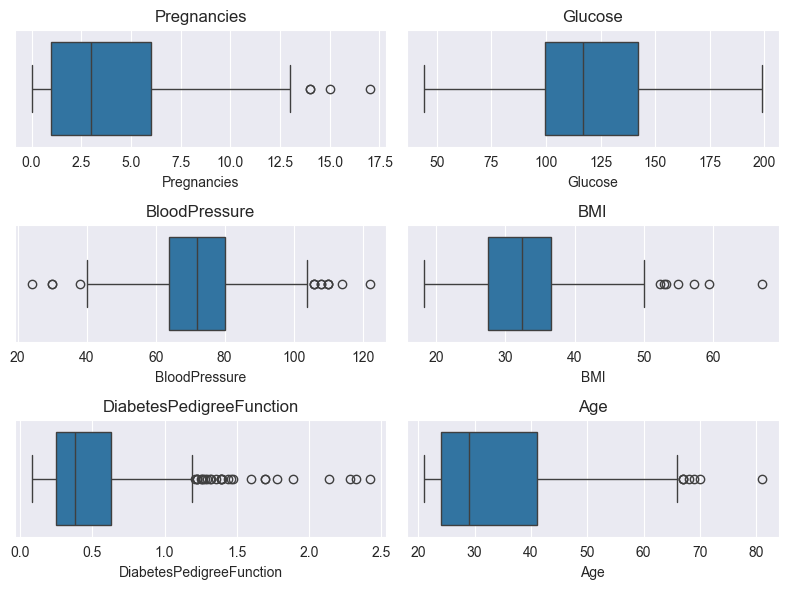

In [9]:
numeric_cols = df.select_dtypes(include='number').columns
target = df['Outcome']
nrows = (len(numeric_cols) + 1)//2
fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(8, 6))
ax = ax.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(col)
plt.tight_layout()
plt.show()

In [10]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BloodPressure'] >= lower_bound)]

In [11]:
df.shape

(720, 7)

Di sini, kita dapat melihat adanya outlier pada beberapa fitur dalam data. Namun, sebagian besar outlier tetap dipertahankan karena dianggap sebagai data valid yang mengandung informasi penting dan dapat berpengaruh terhadap variabel target.

Pengecualian dilakukan pada fitur BloodPressure, di mana nilai-nilai yang berada di bawah kuartil pertama (Q1) dianggap tidak wajar, sehingga dihapus dari dataset.

### Univariate  Analysis

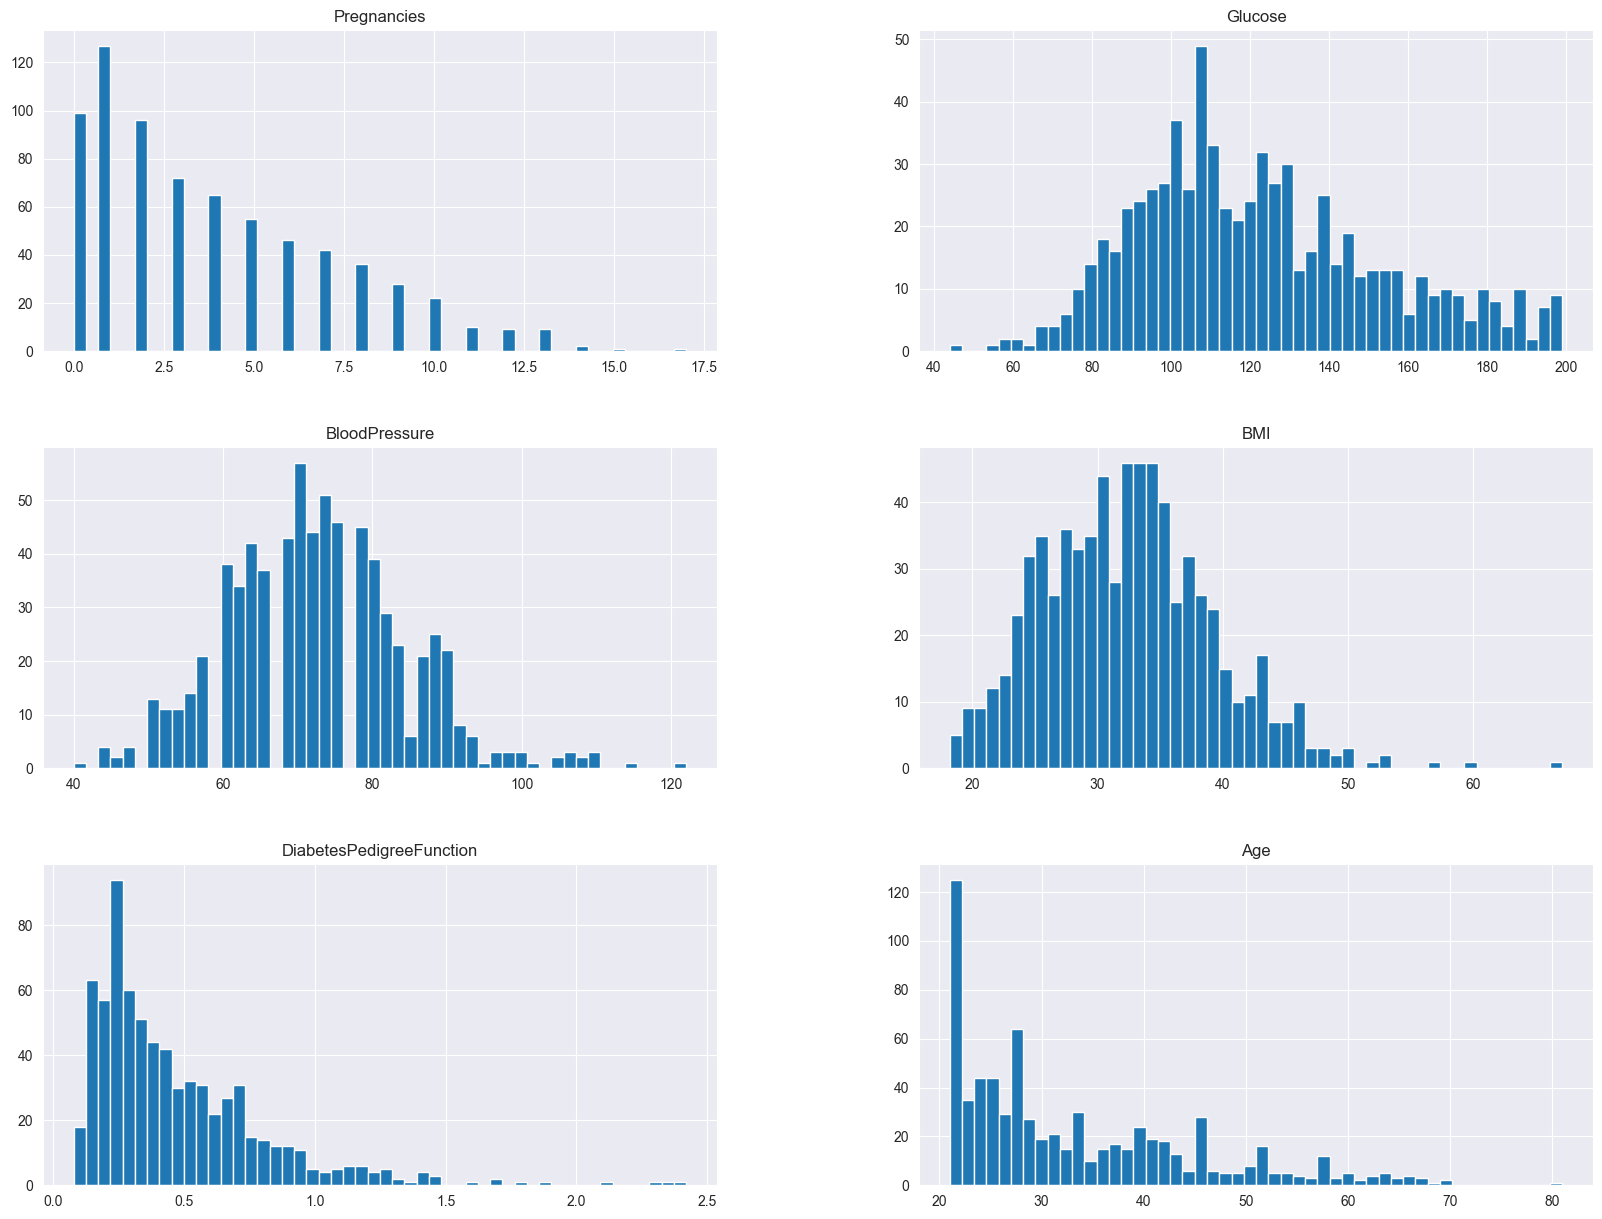

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- Kehamilan: Sebagian besar wanita memiliki jumlah kehamilan antara 0–3 kali.
- Glukosa: Mayoritas nilai glukosa berada di kisaran 100–130 dengan beberapa nilai tinggi.
- Tekanan Darah: Nilai tekanan darah umumnya berkisar antara 60–80.
- BMI: Sebagian besar BMI berada di rentang 25–35, menunjukkan banyak yang overweight atau obesitas.
- Distribusi usia condong ke kiri dengan dominasi usia 20-30 tahun.
- Distribusi DiabetesPedigreeFunction sangat condong ke kiri (right-skewed), dengan sebagian besar nilai berada antara 0.0 dan 0.5.




### Mulivariate  Analysis

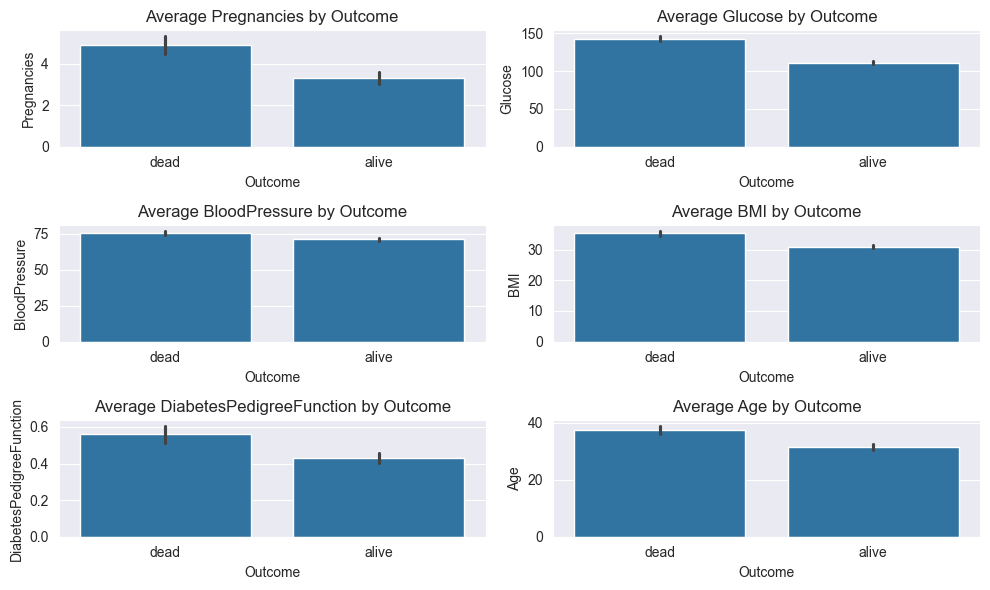

In [13]:
nrows = ((len(numeric_cols)+1)//2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(10,6))  # smaller figure size
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.barplot(x='Outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Average {col} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

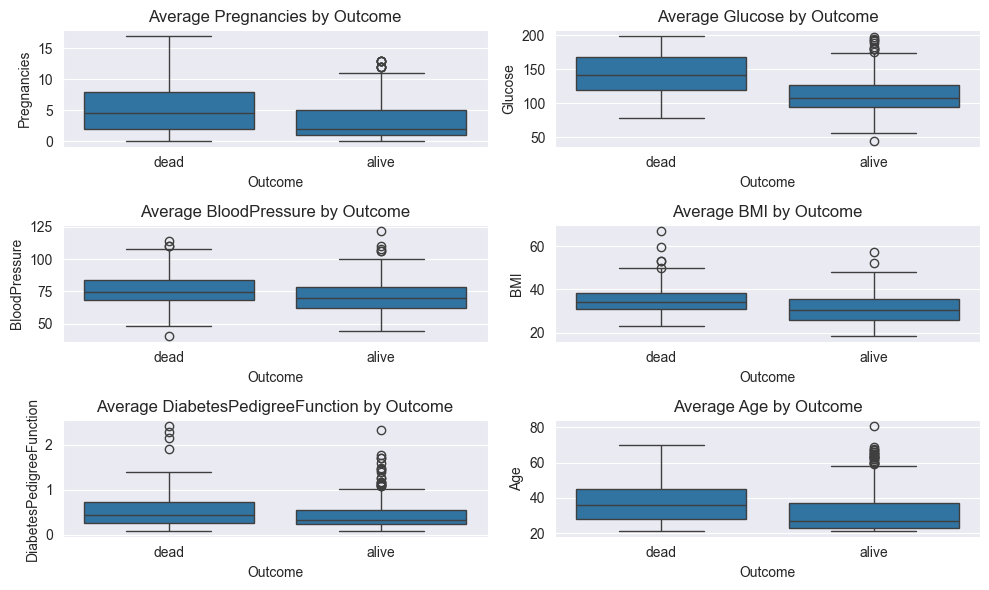

In [14]:
nrows = ((len(numeric_cols)+1)//2)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(10,6))  # smaller figure size
axes = axes.flatten()
for i,col in enumerate(numeric_cols):
    sns.boxplot(x='Outcome', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Average {col} by Outcome')
    axes[i].set_xlabel('Outcome')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

- Glucose: Median pada pasien meninggal lebih tinggi dibandingkan yang masih hidup. Namun terdapat beberapa outlier pada passien yang masih hidup.
- BMI: Median BMI pada pasien meniggal juga terlihat sedikit lebih tinggi dibandingkan yang hidup.
- Pregnancies: Median jumlah kehamilan sedikit lebih tinggi pada pasien yang meninggal, tetapi distribusinya relatif mirip antara kedua kelompok.
- BloodPressure: Median kelompok yang masih hidup sedikit lebih tinggi, namun tidak menunjukkan perbedaan yang signifikan.
- DiabetesPedigreeFunction: Distribusi antar kelompok hampir sama; perbedaan tidak mencolok, tetapi tetap relevan sebagai indikator faktor genetik.
- Age: Pasien yang meninggal cenderung berusia lebih tua dibandingkan yang masih hidup, menjadikan usia sebagai salah satu fitur penting dalam klasifikasi.

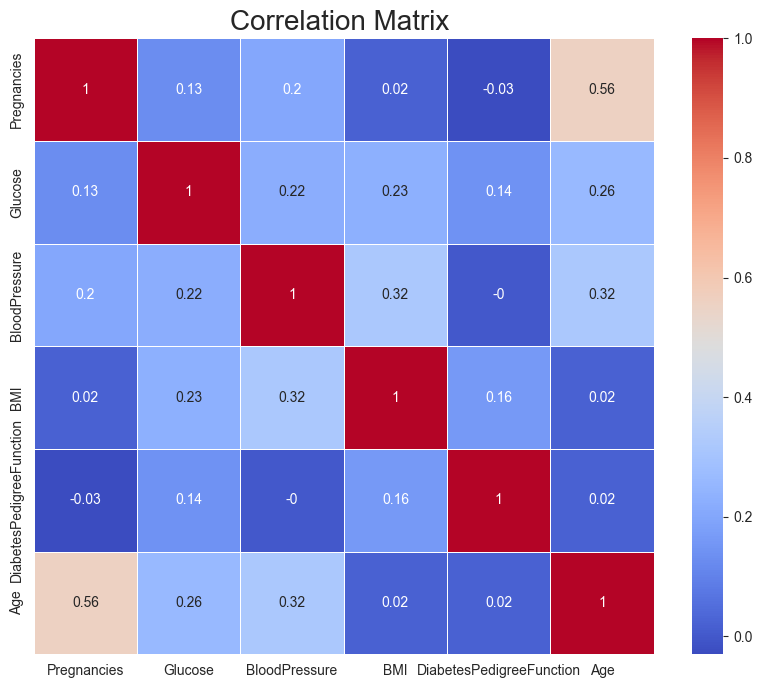

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)
plt.show()

Tidak ada fitur yang memiliki nilai korelasi yang sangat tinggi.

## Data Preparation
- Binning fitur Age dan BMI.
- Men-encode Outcome menjadi 0 dan  1.
- Menentuka fitur yang digunakan untuk model, disini kita tidak akan menggunakan fitur `BloodPressure`.
- Melakukan resampling menggunakan SMOTE untuk mengatasi ketidakseimbangan data.
- Memisahkan data menjadi training dan test.
- Melakukan standarisasi pada data training dan test.

In [16]:
from sklearn.preprocessing import LabelEncoder

bins = [0, 20, 30, 40, 50, 60, 999]
labels = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']
age_encoder = LabelEncoder()
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df['AgeGroupEncoded'] = age_encoder.fit_transform(df['AgeGroup'])

bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_encoder = LabelEncoder()
df['BMICategory'] = pd.cut(df['BMI'], bins=bins, labels=labels)
df['BMICategoryEncoded'] = bmi_encoder.fit_transform(df['BMICategory'])

In [17]:
status = {'alive': 0, 'dead': 1}
reversed_status = {0: 'alive', 1: 'dead'}
df['Outcome'] = df['Outcome'].map(status)
df

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,AgeGroupEncoded,BMICategory,BMICategoryEncoded
0,6,148,72,33.6,0.627,50,1,41–50,2,Obese,1
1,1,85,66,26.6,0.351,31,0,31–40,1,Overweight,2
2,8,183,64,23.3,0.672,32,1,31–40,1,Normal,0
3,1,89,66,28.1,0.167,21,0,21–30,0,Overweight,2
4,0,137,40,43.1,2.288,33,1,31–40,1,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0,60+,4,Obese,1
764,2,122,70,36.8,0.340,27,0,21–30,0,Obese,1
765,5,121,72,26.2,0.245,30,0,21–30,0,Overweight,2
766,1,126,60,30.1,0.349,47,1,41–50,2,Obese,1


In [18]:
feature_cols = [
    'Pregnancies', 'Glucose',
    'DiabetesPedigreeFunction',
    'AgeGroupEncoded', 'BMICategoryEncoded'
]

In [19]:
from imblearn.over_sampling import SMOTE
df_model = df[feature_cols + ['Outcome']].copy()
X = df_model.drop('Outcome', axis=1)
y = df_model['Outcome']

smote = SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y,)
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=123)

In [20]:
scaler = StandardScaler()
X_train[feature_cols] = scaler.fit_transform(X_train.loc[:, feature_cols])
X_train[feature_cols].head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,AgeGroupEncoded,BMICategoryEncoded
74,-1.200158,-0.833493,-0.771914,-0.805740,-1.981891
819,-0.905005,2.210525,0.375107,0.111807,-0.168160
864,-0.314699,-0.135906,0.092418,-0.805740,-0.168160
448,-0.019547,0.149471,-0.218828,2.864448,1.645570
59,0.275606,-0.896910,-0.875238,0.111807,1.645570


In [21]:
X_test[feature_cols] = scaler.transform(X_test.loc[:, feature_cols])
X_test[feature_cols].head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,AgeGroupEncoded,BMICategoryEncoded
553,-0.609852,-0.484699,-0.960328,-0.805740,-0.16816
346,-1.200158,-1.372538,0.164078,-0.805740,-0.16816
906,0.865912,-0.104197,0.486270,1.029354,1.64557
890,-0.019547,0.561682,-0.294104,2.864448,-0.16816
274,-0.609852,0.022637,2.227515,0.111807,-0.16816


## Modeling
- Membuat model Random Forest dengan bantuan GridSearch untuk Hypertunning.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 9],
    'min_samples_leaf': [2, 9],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='precision')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 100}


In [23]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

## Evaluation
- Menghitung nilai akurasi, presisi, recall, dan f1 score.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy     : 0.8095
Precision    : 0.8444
Recall       : 0.7755
F1 Score     : 0.8085

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        91
           1       0.84      0.78      0.81        98

    accuracy                           0.81       189
   macro avg       0.81      0.81      0.81       189
weighted avg       0.81      0.81      0.81       189



In [25]:
predict = X_test.iloc[7:15].copy()
pred_dict = {'y_true': y_test[7:15], 'y_pred': best_rf.predict(predict)}

pd.DataFrame(pred_dict)

,y_true,y_pred
138,0,0
338,1,1
317,1,1
196,0,0
722,1,1
659,0,0
7,1,1
713,1,1
